# Title

# Table of contents

[1. Business Understanding](#1.-Business-Understanding) </br>
[1.1 Business Description](#1.1-Business-Description) </br>
[1.2 Problem Statement](#1.2-Problem-Statement) </br>
[1.3 Main Objective](#1.3-Main-Objective) </br>
[1.4 Specific Objectives](#1.4-Specific-Objectives) </br>
[2. Importing Libraries And Warnings](#2.-Importing-Libraries-And-Warnings) </br>
[3. Data Understanding](#3.-Data-Understanding) </br>
[4. Data Preparation](#4.-Data-Preparation) </br>
[5. EDA](#5.-EDA) </br>
[6. Data Preprocessing](#6.-Data-Preprocessing) </br>
[7. Data Modelling](#7.-Data-Modelling) </br>
[8. Evaluation](#8.-Evaluation) </br>
[9. Recommendations](#9.-Recommendations) </br>
[10. Conclusions](#10.-Conclusions) </br>
[11. Challenges](#11.-Challenges)

# 1. Business Understanding

## 1.1 Business Description

Hotel booking entails the process through which guests are able to schedule dates and length of stay, room preference among other specifications in a hotel. Bookings can be done physically at the hotel premises, through an agent or online etc. Recently, City and Resort Hotels have been affected by high cancellation rates among other booking trends. As a result, this has led to low revenue generation in those facilities. Since the goal of every business entity is to make profit, the cancellation rates should be dealt with and maintained as low as possible. 
In this analysis we will address the factors which have highly contributed to high hotel cancellation rates and give recommendations to the hotel owners so that they can mitigate this risk better and earn more profit. The analysis will also be useful to the consumers of the hotel facilities and thus they will be in a position to know the ideal times of the year to book for the hotel rooms, the optimal stay length that offers them best rates etc.
The aim of this project is to analyze the Hotels data and study cancellations and their underlying patterns in order to reduce them and secure revenue. 


## 1.2 Problem Statement

## 1.3 Main Objective

## 1.4 Specific Objectives

# 2. Importing Libraries And Warnings

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 3. Data Understanding

hotel: Type of hotel (e.g., Resort Hotel, City Hotel). </br>
is_canceled: Whether the booking was canceled (1 for canceled, 0 for not canceled).</br>
lead_time: Number of days between booking and arrival.</br>
arrival_date_year: Year of arrival.</br>
arrival_date_month: Month of arrival.</br>
arrival_date_week_number: Week number of arrival.</br>
arrival_date_day_of_month: Day of the month of arrival.</br>
stays_in_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed.</br>
stays_in_week_nights: Number of weekday nights (Monday to Friday) the guest stayed.</br>
adults, children, babies: Number of adults, children, and babies in the booking.</br>
meal: Type of meal booked.</br>
country: Country of origin of the guest.</br>
market_segment: Market segment designation.</br>
distribution_channel: Booking distribution channel.</br>
is_repeated_guest: Whether the guest is a repeated guest (1 for repeated, 0 for not repeated).</br>
previous_cancellations: Number of previous bookings that were canceled by the guest.</br>
previous_bookings_not_canceled: Number of previous bookings that were not canceled by the guest.</br>
reserved_room_type: Type of room reserved.</br>
assigned_room_type: Type of room assigned.</br>
booking_changes: Number of changes or modifications made to the booking.</br>
deposit_type: Type of deposit made.</br>
agent: ID of the travel agency that made the booking.</br>
company: ID of the company associated with the booking.</br>
days_in_waiting_list: Number of days the booking was in the waiting list.</br>
customer_type: Type of booking customer.</br>
adr: Average daily rate (an indicator of the rate paid for the room).</br>
required_car_parking_spaces: Number of car parking spaces required.</br>
total_of_special_requests: Total number of special requests made by the guest.</br>
reservation_status: Status of the reservation (e.g., Check-Out, Canceled).</br>
reservation_status_date: Date when the reservation status was last updated.</br>
name: contains the names of the guests who made the hotel bookings.</br>
email: contains the email addresses of guests.</br>
phone-number: contains guest phone numbers.</br>
credit_card: contains credit card information.

In [2]:
# loading our dataset and assigning it to a variable hotel
hotel = pd.read_csv("Data/hotel_booking.csv")
hotel.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,Transient,96.14,0,0,Check-Out,2017-09-06,Claudia Johnson,Claudia.J@yahoo.com,403-092-5582,************8647
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,Transient,225.43,0,2,Check-Out,2017-09-07,Wesley Aguilar,WAguilar@xfinity.com,238-763-0612,************4333
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,Transient,157.71,0,4,Check-Out,2017-09-07,Mary Morales,Mary_Morales@hotmail.com,395-518-4100,************1821
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,Transient,104.40,0,0,Check-Out,2017-09-07,Caroline Conley MD,MD_Caroline@comcast.net,531-528-1017,************7860
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,Transient,151.20,0,2,Check-Out,2017-09-07,Ariana Michael,Ariana_M@xfinity.com,422-804-6403,************4482


In [3]:
#Looking at each columns datatypes
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [4]:
#summary of statistics that has to do with the DataFrame
hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
# checking the columns in our dataset
hotel.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')

In [6]:
# checking the shape of our data
hotel.shape

(119390, 36)

# 4. Data Preparation

# Missing Values

In [7]:
#checking for missing values
hotel.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

## Handling country missing values

In [8]:
# looking at the missing values in the country column
hotel["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', nan, 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'E

In [9]:
#The sum of the missing values
sum_nan = hotel["country"].isna().sum()
sum_nan

488

In [10]:
# Sum of all values in the country column
sum_country = hotel["country"].value_counts().sum()
sum_country

118902

In [11]:
#Looking at the percentage of the missing values
perc_nan = sum_nan / sum_country * 100
print(round(perc_nan, 4))

0.4104


Removing the country missing values beacuse the number of missing values which is 488 is insignificantly small.

In [12]:
# dropping country nan values
hotel.dropna(subset = ["country"], inplace = True)

In [13]:
# confirming that the missing values have been removed
hotel["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

## Handling agent missing values

In [14]:
# looking at the missing values in the agent column
hotel["agent"].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16.,  34., 252., 270.,  47., 114., 301.,
       193., 182., 135., 350., 195., 352., 355., 159., 139., 363., 384.,
       360., 331., 367.,  64.,  78., 406., 163., 41

In [15]:
#Filling the missing values with 0 as a unique ID
hotel["agent"].fillna(0, inplace=True)

#confirming that the agent nan values have been replaced with 0
hotel["agent"].unique()

array([  0., 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16.,  34., 252., 270.,  47., 114., 301.,
       193., 182., 135., 350., 195., 352., 355., 159., 139., 363., 384.,
       360., 331., 367.,  64.,  78., 406., 163., 41

The nan values have been replaced with 0. 0 represents the clients that did not use an agent

## Handling company missing values

In [16]:
#The sum of the missing values
hotel["company"].unique()

array([ nan, 110., 113., 270., 178., 240., 154., 144., 307., 268.,  59.,
       204., 312., 318.,  94., 174., 274., 195., 223., 317., 281., 118.,
        53., 286.,  12.,  47., 324., 342., 373., 371.,  86.,  82., 218.,
        88.,  31., 397., 392., 405., 331., 367.,  20.,  83., 416.,  51.,
       395., 102.,  34.,  84., 360., 394., 382., 461., 478., 112., 486.,
       421.,   9., 308., 135., 224., 504., 269., 356., 498., 390., 513.,
       203., 263., 477., 521., 169., 515., 445., 337., 251., 428., 292.,
       388., 130., 250., 355., 254., 543., 531., 528., 120.,  81., 116.,
       530., 103.,  62.,  39.,  16.,  61.,  92., 501., 291., 290., 192.,
        43., 465., 287., 297., 207., 437., 165., 329., 272.,  28.,  77.,
       482., 200.,  42., 338., 108.,  72., 246., 319., 146., 159., 380.,
       323., 511., 407., 325., 278.,  80., 403., 399.,  14., 137., 343.,
       346., 347., 349., 289., 351., 353.,  54.,  99., 358., 361., 362.,
       366., 372., 365., 277., 109., 377., 379.,  2

In [17]:
# Sum of all non-missing values in the company column
sum_company = (~hotel["company"].isna()).sum()
sum_company

6623

In [18]:
#The sum of the missing values
sum_nan = hotel["company"].isna().sum()
sum_nan

112279

In [19]:
# Sum of all values in the company column
total_company= sum_nan + sum_company
total_company

118902

In [20]:
#Looking at the percentage of the missing values
perc_nan = sum_nan / total_company * 100
print(round(perc_nan, 4))

94.4299


In [21]:
#Dropping the company column 
hotel.drop("company", axis=1, inplace=True)
hotel.shape

(118902, 35)

We have dropped the company column because it has 94% of the missing values in the column

We can see that our data now has 35 columns and 118,902 rows after the column company has been dropped

In [22]:
# Checking if there any missing values left
hotel.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          4
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

## Duplicates

In [23]:
#Looking for duplicates in the dataset
hotel.duplicated().sum()

0

We have 0 duplicates in our dataset

## Placeholders

In [24]:
# checking for placeholders
place_holder = ['\\#',',','/','-','@','\\*','_']

# for loop to loop through the columns checking for any placeholder
for placeholder in hotel.columns:
    if hotel[placeholder].dtype == 'object':
        for hold in place_holder:
            if hotel[placeholder].str.contains(hold).any():
                print(f"We have found place holders, '{hold}' in column '{placeholder}' ")

We have found place holders, '/' in column 'market_segment' 
We have found place holders, '/' in column 'distribution_channel' 
We have found place holders, '-' in column 'customer_type' 
We have found place holders, '-' in column 'reservation_status' 
We have found place holders, '-' in column 'reservation_status_date' 
We have found place holders, '@' in column 'email' 
We have found place holders, '_' in column 'email' 
We have found place holders, '-' in column 'phone-number' 
We have found place holders, '\*' in column 'credit_card' 


In [25]:
# removing placeholders that have been gotten
rem_place_holders = {'market_segment':'/',
                     'distribution_channel':'/',
                     'customer_type':'-',
                     'reservation_status': '-',
                     'reservation_status_date':'-',
                     'email':'@',
                     'email':'_',
                     'phone-number':'-',
                     'credit_card':'\\*' }
for placeholder, hold in rem_place_holders.items():
    hotel[placeholder] = hotel[placeholder].str.replace(hold,'', regex = True)

In [26]:
for placeholder in hotel.columns:
    if hotel[placeholder].dtype == 'object':
        for hold in place_holder:
            if hotel[placeholder].str.contains(hold).any():
                print(f"We have found place holders, '{hold}' in column '{placeholder}' ")

We have found place holders, '@' in column 'email' 


In [27]:
# removing @ from email
hotel['email']= hotel['email'].str.replace('@','')
hotel['email']

0         Ernest.Barnes31outlook.com
1               AndreaBaker94aol.com
2           RebeccaParkercomcast.net
3                    LauraMgmail.com
4                  LHinesverizon.com
                     ...            
119385            Claudia.Jyahoo.com
119386           WAguilarxfinity.com
119387        MaryMoraleshotmail.com
119388         MDCarolinecomcast.net
119389            ArianaMxfinity.com
Name: email, Length: 118902, dtype: object

## Removing whitespace

In [28]:
hotel_whitespace = [col for col in hotel.columns if col.strip() != col]
print("Columns with whitespace:", hotel_whitespace)

Columns with whitespace: []


## Outliers

In [29]:
hotel['adr']

0           0.00
1           0.00
2          75.00
3          75.00
4          98.00
           ...  
119385     96.14
119386    225.43
119387    157.71
119388    104.40
119389    151.20
Name: adr, Length: 118902, dtype: float64

In [30]:
# since children has 4 missing values we impute the median since it is least affected by outliers
hotel['children'].fillna(value= hotel['children'].median(), inplace=True )

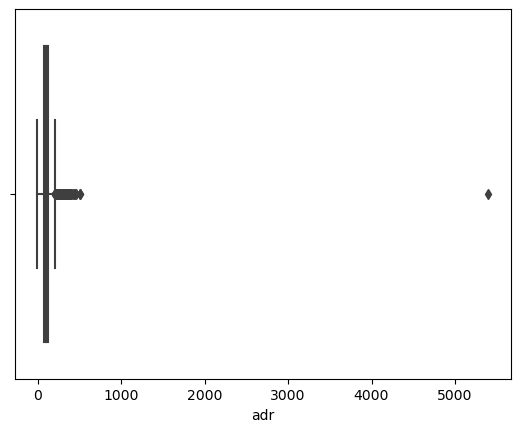

In [31]:
# Creating a loop for creating a boxplot for each column

sns.boxplot(x = hotel['adr'])
plt.show()

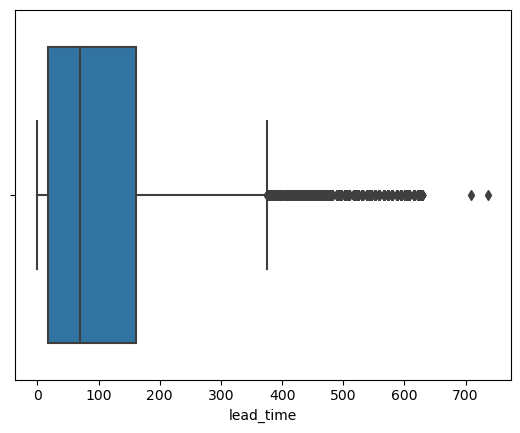

In [32]:
sns.boxplot(x = hotel['lead_time'])
plt.show()

Removing the outliers may affect the distribution of our dataset, affecting further data analysis relevant to predict hotel cancelation.

# 5. EDA

# 6. Data Preprocessing

###### Feature Engineering

C:\Users\admin\AppData\Local\Temp\ipykernel_18456\3038480313.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = hotel.corr()


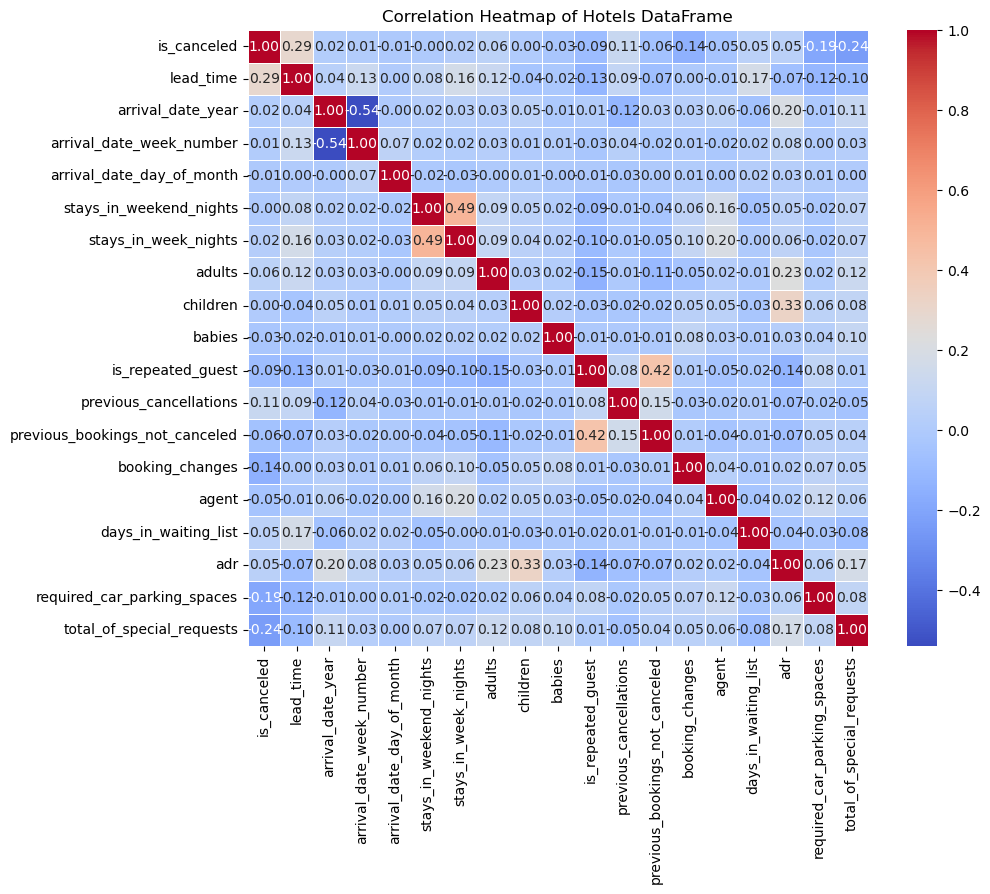

In [33]:
# Calculate the correlation matrix
correlation_matrix = hotel.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Hotels DataFrame")
plt.show()

We deleted the following columns: name, email, phone-number and credit_card since they are not useful in supporting our objectives. 

A correlation coefficient of 0.54 indicates a moderate positive correlation between arrival_date_year and arrival_date_week_number. This can lead to unstable coefficient estimates. We will only use arrival_date_week_number which can help to improve the model's stability and interpretability.

Also drop name, email, phone-number and credit-card columns to reduce the dimensionality and computational complexity.Also, they may not be relevant for analysis and could pose privacy concerns.

In [35]:
hotel["arrival_date_week_number"].unique()

array([27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53,  1,  2,  3,  4,  5,  6,  7,
        8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
       25, 26], dtype=int64)

In [36]:
drop_column=["name","email","phone-number", "credit_card"]


In [37]:
hotel.drop(drop_column, axis=1, inplace=True)

In [38]:
#Create a feature that represents the total number of people
hotel['total_guests'] = hotel['adults'] + hotel['children'] + hotel['babies']
hotel.drop(['adults', 'children', 'babies'], axis=1, inplace=True)

In [39]:
(hotel['total_of_special_requests'].value_counts()/hotel['total_of_special_requests'].value_counts().sum())*100

0    58.864443
1    27.858236
2    10.868614
3     2.091638
4     0.285109
5     0.031959
Name: total_of_special_requests, dtype: float64

Since the number of rows without special requests is more than 50% of the dataset, creating a binary feature indicating whether any special requests were made by the guest will reduce computational complexity while preserving the essential information regarding guest preferences and additional services, thus streamlining subsequent analyses and model development.

In [40]:
#Create a binary feature indicating whether any special requests were made by the guest 
hotel['has_special_requests'] = (hotel['total_of_special_requests'] > 0).astype(int)

# Drop the 'total_of_special_requests' column
hotel.drop(['total_of_special_requests'], axis=1, inplace=True)

In [41]:
hotel['lead_time'].sort_values(ascending = False)

1        737
4182     709
65237    629
65254    629
65231    629
        ... 
94024      0
90808      0
39609      0
79612      0
70263      0
Name: lead_time, Length: 118902, dtype: int64

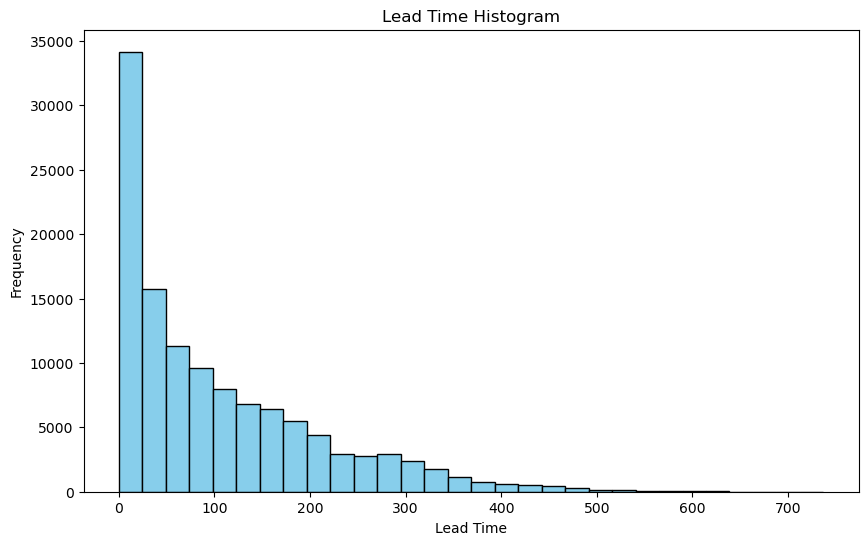

In [42]:
plt.figure(figsize=(10, 6))

# Create the histogram
plt.hist(hotel['lead_time'], bins=30, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.title('Lead Time Histogram')

# Show the histogram
plt.show()

The histogram reveals a positively skewed distribution of lead times, indicating that a significant portion of bookings are characterized by shorter lead times, while comparatively fewer involve longer lead times. To effectively represent this distribution in the hotel dataset, wider bins have been strategically applied towards the right end, accommodating the variations in lead times more accurately.

In [43]:
#Use wider bins for longer lead times since the data is positively skewed.
bin_edges = [0, 30, 90, 180, 365, float('inf')]
bin_labels = ['0-30 days', '31-90 days', '91-180 days', '181-365 days', '365+ days']

#Create a new column 'lead_time_category'
hotel['lead_time_category'] = pd.cut(hotel['lead_time'], bins=bin_edges, labels=bin_labels)
hotel.drop(['lead_time'], axis=1, inplace=True)

hotel['lead_time_category'].value_counts()

0-30 days       32094
31-90 days      29516
91-180 days     26413
181-365 days    21508
365+ days        3148
Name: lead_time_category, dtype: int64

It's evident that a majority of bookings occur relatively close to the arrival date (0-30 days), but a significant number of guests also plan their stays with lead times extending beyond three months. A smaller percentage plan well in advance with lead times exceeding 365 days.

In [44]:
#hotel["reserved_room_type"].unique()
hotel["assigned_room_type"].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'L', 'K', 'P'],
      dtype=object)

In [45]:
# Create a new binary column 'reserved_is_assigned' based on the comparison
hotel['reserved_is_assigned'] = (hotel['assigned_room_type'] == hotel['reserved_room_type']).astype(int)
hotel.drop(['assigned_room_type', "reserved_room_type"], axis=1, inplace=True)

In [46]:
hotel['reserved_is_assigned'].value_counts()

1    104203
0     14699
Name: reserved_is_assigned, dtype: int64

This reserved_is_assigned column serves as a valuable indicator of whether guests receive the specific room type they initially reserved, which can be useful for analyzing guest satisfaction and booking accuracy within the hotel dataset.

In [47]:
#Combine the 'arrival_date_year', 'arrival_date_month', and 'arrival_date_day_of_month' columns into a single datetime column
hotel['arrival_date'] = hotel['arrival_date_year'].astype(str) + "-" + hotel['arrival_date_month'] + "-" + hotel['arrival_date_day_of_month'].astype(str)

# Convert the combined column to datetime format
hotel['arrival_date'] = pd.to_datetime(hotel['arrival_date'], format="%Y-%B-%d")

# Format the datetime column as "%Y-%m-%d"
hotel['arrival_date'] = hotel['arrival_date'].dt.strftime("%Y-%m-%d")
hotel.drop(['arrival_date_year', "arrival_date_month", "arrival_date_day_of_month"], axis=1, inplace=True)

Combine the 'arrival_date_year,' 'arrival_date_month,' and 'arrival_date_day_of_month' columns into a single column and then convert the resultant column to the standard "%Y-%m-%d" format

In [48]:
#Create a binary feature indicating whether an agent was involved in the booking.
hotel['agent_involved'] = hotel['agent'].notna().astype(int)
hotel.drop(['agent'], axis=1, inplace=True)

In [49]:
hotel.head()


,hotel,is_canceled,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,meal,country,market_segment,distribution_channel,is_repeated_guest,...,adr,required_car_parking_spaces,reservation_status,reservation_status_date,total_guests,has_special_requests,lead_time_category,reserved_is_assigned,arrival_date,agent_involved
0,Resort Hotel,0,27,0,0,BB,PRT,Direct,Direct,0,...,0.0,0,CheckOut,20150701,2.0,0,181-365 days,1,2015-07-01,1
1,Resort Hotel,0,27,0,0,BB,PRT,Direct,Direct,0,...,0.0,0,CheckOut,20150701,2.0,0,365+ days,1,2015-07-01,1
2,Resort Hotel,0,27,0,1,BB,GBR,Direct,Direct,0,...,75.0,0,CheckOut,20150702,1.0,0,0-30 days,0,2015-07-01,1
3,Resort Hotel,0,27,0,1,BB,GBR,Corporate,Corporate,0,...,75.0,0,CheckOut,20150702,1.0,0,0-30 days,1,2015-07-01,1
4,Resort Hotel,0,27,0,2,BB,GBR,Online TA,TATO,0,...,98.0,0,CheckOut,20150703,2.0,1,0-30 days,1,2015-07-01,1


###### Preprocessing

In [50]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118902 entries, 0 to 119389
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           118902 non-null  object  
 1   is_canceled                     118902 non-null  int64   
 2   arrival_date_week_number        118902 non-null  int64   
 3   stays_in_weekend_nights         118902 non-null  int64   
 4   stays_in_week_nights            118902 non-null  int64   
 5   meal                            118902 non-null  object  
 6   country                         118902 non-null  object  
 7   market_segment                  118902 non-null  object  
 8   distribution_channel            118902 non-null  object  
 9   is_repeated_guest               118902 non-null  int64   
 10  previous_cancellations          118902 non-null  int64   
 11  previous_bookings_not_canceled  118902 non-null  int64   
 12  bo

In [51]:
#drop datetime columns
columns = ["reservation_status_date", "arrival_date"]
hotel.drop(columns, axis=1, inplace=True)

In [52]:
# Moving the "hotel" column of the hotel DataFrame to index 1
hotel_column = hotel['hotel']

# Drop the 'hotel' column from the DataFrame
hotel.drop(columns='hotel', inplace=True)

# Reinsert the 'hotel' column at index 1
hotel.insert(1, 'hotel', hotel_column)

# Use a lambda function to keep only the first names of the hotel column
hotel['hotel'] = hotel['hotel'].apply(lambda x: x.split()[0])

In [53]:
categorical_columns = ["hotel","meal", "country", "market_segment", 
                       "distribution_channel", "deposit_type", "customer_type", "reservation_status",
                      "lead_time_category"]

In [54]:
hotel_encoded = pd.get_dummies(hotel, columns=categorical_columns, drop_first=True)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
    # Scaling and splitting data into training and testing sets
X = hotel_encoded.drop(columns=['is_canceled'])  # Features (excluding 'is_canceled')
y = hotel_encoded['is_canceled']  # Target variable

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [60]:
hotel_encoded.head()

,is_canceled,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,...,deposit_type_Refundable,customer_type_Group,customer_type_Transient,customer_type_TransientParty,reservation_status_CheckOut,reservation_status_NoShow,lead_time_category_31-90 days,lead_time_category_91-180 days,lead_time_category_181-365 days,lead_time_category_365+ days
0,0,27,0,0,0,0,0,3,0,0.0,...,0,0,1,0,1,0,0,0,1,0
1,0,27,0,0,0,0,0,4,0,0.0,...,0,0,1,0,1,0,0,0,0,1
2,0,27,0,1,0,0,0,0,0,75.0,...,0,0,1,0,1,0,0,0,0,0
3,0,27,0,1,0,0,0,0,0,75.0,...,0,0,1,0,1,0,0,0,0,0
4,0,27,0,2,0,0,0,0,0,98.0,...,0,0,1,0,1,0,0,0,0,0


# 7. Data Modelling

# 8. Evaluation

# 9. Recommendations

# 10. Conclusions

# 11. Challenges